## Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       499 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing["CHAS"]

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,499.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287297,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704429,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.627000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

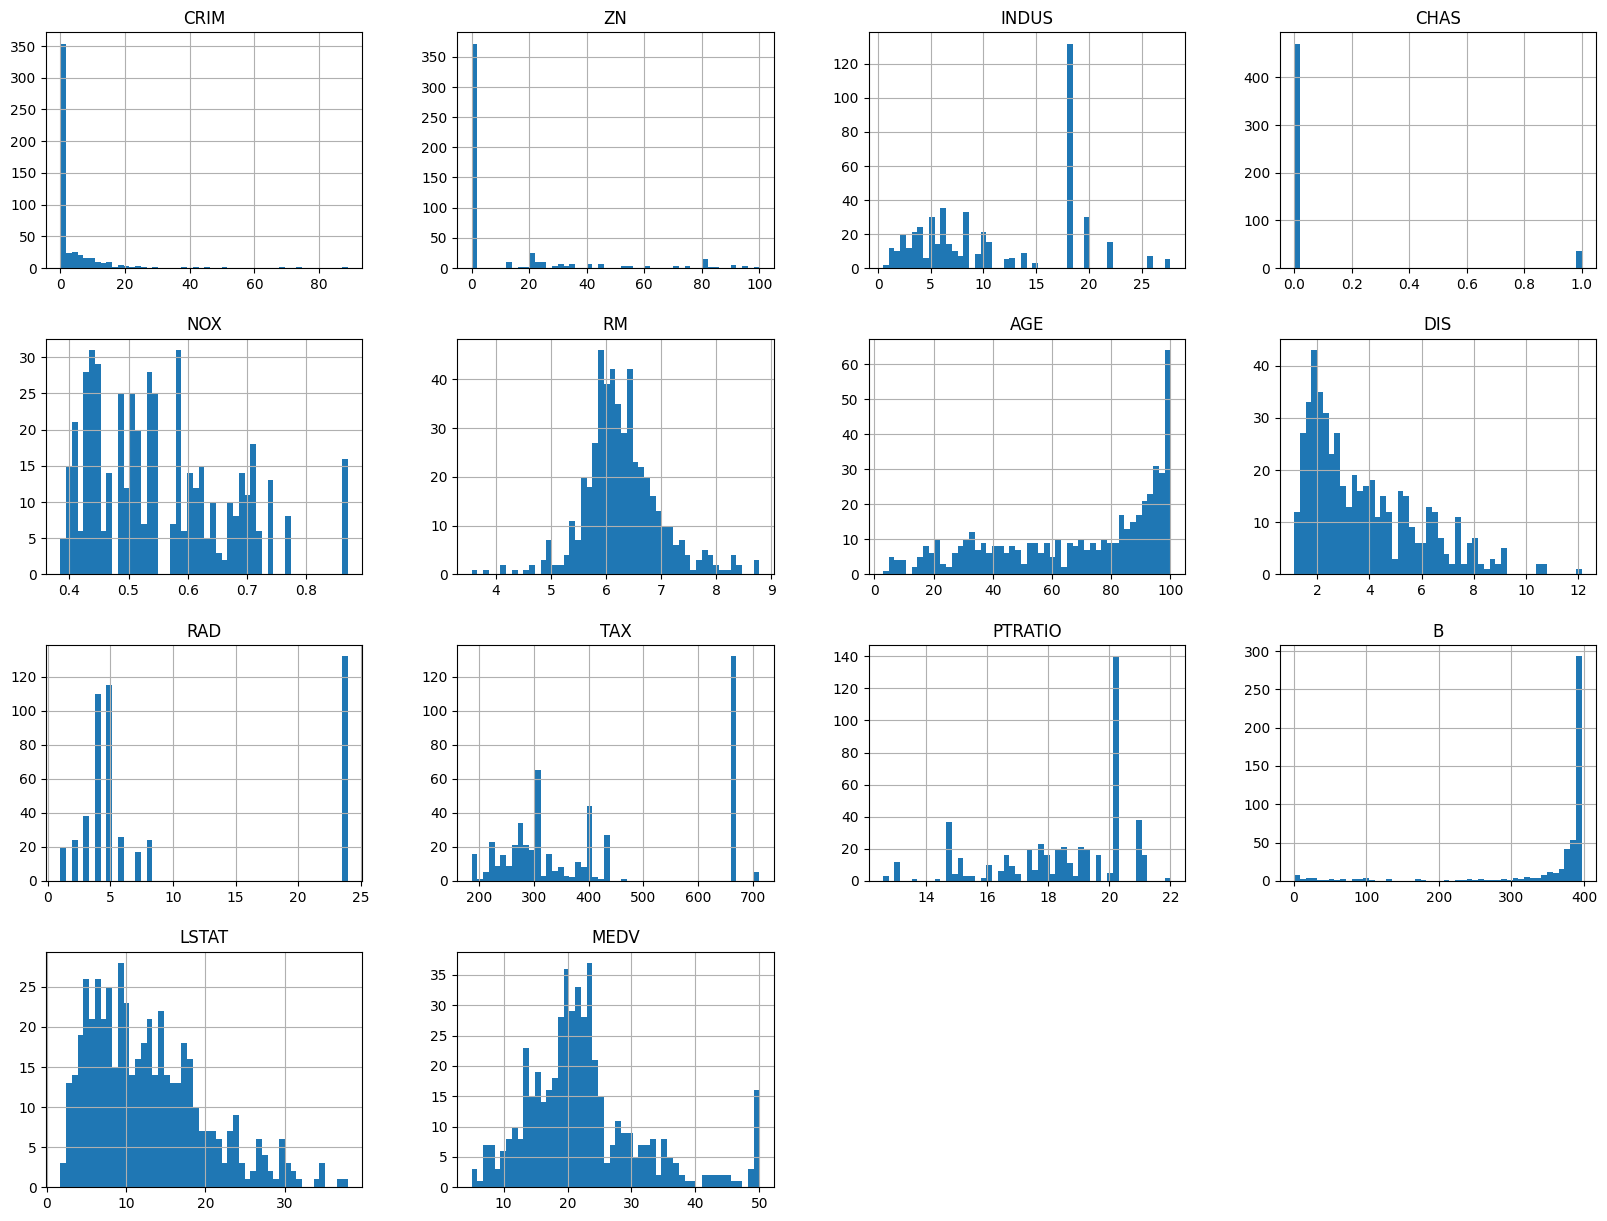

In [9]:
# For Plotting Histogram
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))

## Test-Train Splitting

In [10]:
# For Learning Purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
# print(f"No of rows in train data = {len(train_set)}")

In [13]:
# print("No of rows in train data = " + str(len(test_set)))

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print("No of rows in train data = " + str(len(train_set)) + "\nNo of rows in test data = " +str(len(test_set)))

No of rows in train data = 404
No of rows in test data = 102


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
datax = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in datax.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
strat_train_set["CHAS"].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
376/28

13.428571428571429

In [18]:
strat_test_set["CHAS"].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [19]:
95/7

13.571428571428571

In [20]:
# So the ratio of different values in test and train data is similar

In [21]:
housing = strat_train_set.copy()
housing_test = strat_test_set.copy()

## Looking for Correlations

In [22]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.680402
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

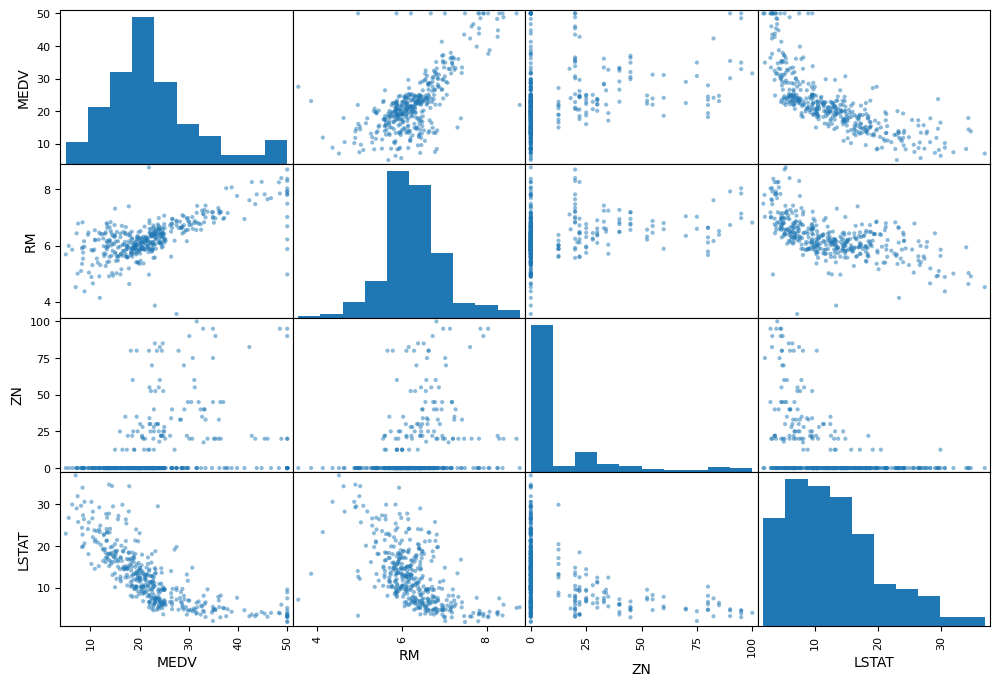

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

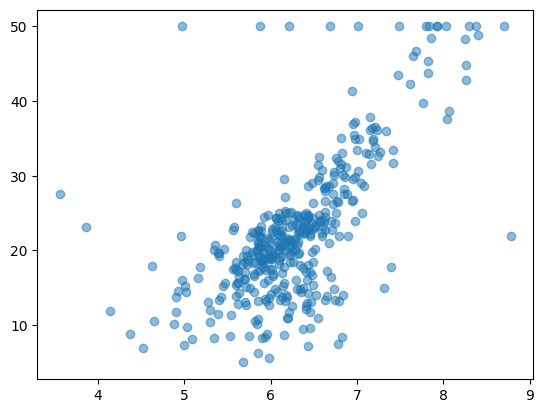

In [24]:
# housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.5)
plt.scatter(housing["RM"], housing["MEDV"], alpha = 0.5)
plt.show()

In [25]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]
housing_test["TAXRM"] = housing_test["TAX"]/housing_test["RM"]

<Axes: xlabel='TAXRM', ylabel='MEDV'>

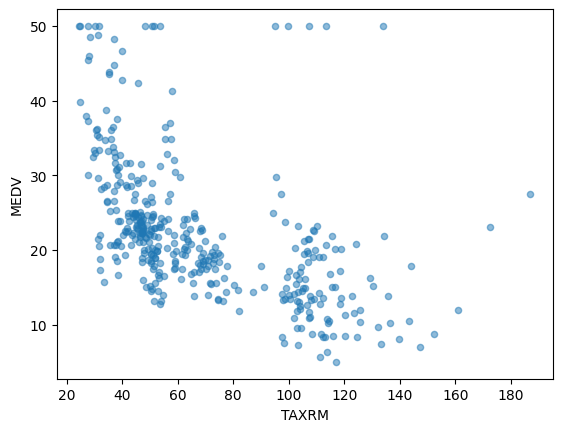

In [26]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 0.5)

In [27]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282040,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.775296
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713814,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.531998
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.229977
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [28]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.680402
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.524780
LSTAT     -0.740494
Name: MEDV, dtype: float64

## Missing Attribites

In [29]:
# To take care of missing attributes we have 3 options
#     1. Get rid of missing data points
#     2. Get rid of whole atrribute
#     3. Set the missing values to some value (0, mean or median)

In [30]:
# Option 1
a = housing.dropna(subset=["RM"])
a.shape

(399, 15)

In [31]:
# Option 2
b = housing.drop("RM",axis = 1)
b.shape

(404, 14)

In [32]:
# Option 3
median = housing["RM"].median()
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
housing.shape

(404, 15)

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21600000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.52299769e+01])

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281223,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.620033
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709410,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.366536
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.229977
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


## Scikit Learn Design

Primarily, 3 types of objects
1. Estimators - It estimates some parameters based on a dataset. Eg. imputer. It has a fit method and  transform method. Fit method - Fits the dataset and calculates internal parameters.
2. Transformers - Transform method takes input and returns output based on the learnings from fit(). It also has a convinience function called fit_transformer() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor.fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

There are primarily two types of feature scaling methods:
1. Min-Max scaling (Normalization)
    value = (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
   
2. Standardization
    value = (value-mean)/std
    This makes the variance 1 and mean remains same
    Sklearn provides a class called StandardScaler for this

## Creating Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("std_scaler", StandardScaler()),
])
# Can add more components to the pipeline also. Here we have added just 2


In [40]:
# housing = strat_train_set.drop("MEDV", axis = 1)
housing = housing.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()
# housing_test = strat_test_set.drop("MEDV", axis = 1)
housing_test = housing_test.drop("MEDV", axis = 1)
housing_test_labels = strat_test_set["MEDV"].copy()

In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.308270,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,63.941653
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.668707,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,31.190165
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,28.994929
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.903250,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,40.316864
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,49.859483
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.542250,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,83.635098
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,160.947318


## Selecting a Desired Model for Ayush Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
model = Lasso()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

Lasso()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels.iloc[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
model.predict(prepared_data)

array([26.41758742, 28.32344334, 19.23802906, 25.34768255, 25.48325499])

In [48]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [49]:
test_data = my_pipeline.transform(housing_test)

In [50]:
test_labels = housing_test_labels

## Evaluating the model

In [51]:
from sklearn.metrics import mean_squared_error
predicted_data = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,predicted_data)
lin_rmse = np.sqrt(lin_mse)

In [52]:
lin_rmse

5.4314898450083655

In [53]:
housing_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.308270,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,63.941653
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.668707,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,31.190165
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,28.994929
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.903250,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,40.316864
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.185000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,49.859483
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.542250,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,83.635098
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,160.947318


## Using Better validation technique - Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-1 * scores)
rmse_scores

array([4.50277882, 4.41330974, 4.98358395, 4.67794923, 5.93954351,
       4.59644529, 8.26453589, 5.62176965, 4.60261651, 7.00550105])

In [55]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())

In [56]:
print_scores(rmse_scores)

Scores :  [4.50277882 4.41330974 4.98358395 4.67794923 5.93954351 4.59644529
 8.26453589 5.62176965 4.60261651 7.00550105]
Mean :  5.460803364080649
Standard Deviation :  1.2182512758897017


## Saving the model

In [57]:
from joblib import dump, load
dump(model, "Estate.joblib")

['Estate.joblib']

## Testing the model

In [58]:
from sklearn.metrics import mean_squared_error
predicted_data = model.predict(test_data)
lin_mse = mean_squared_error(housing_test_labels,predicted_data)
lin_rmse = np.sqrt(lin_mse)

In [59]:
lin_rmse

4.637653204076654

In [60]:
print(list(housing_test_labels))

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]


In [61]:
print(predicted_data)

[27.24274465 16.64023366 27.19805826 26.07877201 10.25096001 16.23603872
 18.6183875  18.40817846 31.2671268  31.71543898 17.34981179  0.42041065
 24.52346105 19.18334088 21.56415598 12.57255599 30.08446527 16.45272608
 25.36284131 18.99161433 21.70104181 16.40152063 21.81579594 24.12550661
 21.75242901 29.24609261 20.25152958 30.36611038  8.40900595 33.03985845
 22.32609255 20.81394154 26.17050437 16.24212632 25.58917661 18.22055584
 33.37436251 25.45071174 25.36027137 33.53550745 24.60658338 30.58962295
 22.42214233 24.80842637 17.59328706 30.75042812 36.26636918 22.20001268
 18.71341629 22.87152752 21.83969798 14.06105077 20.65367713 19.44267305
 27.88083675 31.44015646 36.58117793 29.84732304 18.48924704 22.18335635
 36.10998695 17.85867399 20.9262018  24.22085978 18.4094873  30.55547014
 23.18938283 19.29903886 23.51357564 30.19973863 29.08487182 25.83808694
 22.65179735 24.86692731 34.42506132 12.38760266 20.76165249 24.16102087
 23.124644   23.66251339 24.23390869 22.68419291 15

In [62]:
test_data[0]

array([-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        0.36523047, -0.33092752,  1.20235683, -1.0016859 ,  0.05733231,
       -1.21003475,  0.38110555, -0.57309194, -0.0987637 ])

## Using the model

In [63]:
import numpy as np
from joblib import dump, load
model = load("Estate.joblib")
input = np.array([[-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        3.36523047, -0.33092752,  11.20235683, 1.0016859 ,  0.05733231,
       -1.21003475,  0.38110555, -0.57309194, -0.0987637 ],[-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        0.36523047, -0.33092752,  1.20235683, -1.0016859 ,  0.05733231,
       -1.21003475,  0.38110555, -0.57309194, -0.0987637 ]])
model.predict(input)

array([35.19275408, 27.24274465])